In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import pyarabic.araby as araby
import arabic_reshaper
from spellchecker import SpellChecker
from tqdm import tqdm
from aaransia import transliterate


### Preprocess N1

In [13]:
#this next file it just a exemple to present how we will handle it
data=pd.read_csv('file of data.csv')


In [23]:
""""the idea of this process is to remove all strange letters from arabic,
and drop duplicate letters in words like "هههههههه" or "لااااااااااا" 
"""
def preprocessing_V0_1_0(data):
    for i in tqdm(range(len(data))):
        #get just arabic text
        data['tweet'].iloc[i]=re.sub(r'[u0600-u06FF]+', '', data['tweet'].iloc[i]).strip()
        data['tweet'].iloc[i]=re.sub(r'[a-z]+', '', data['tweet'].iloc[i]).strip()
        #remove duplicate letter
        data['tweet'].iloc[i]=re.sub(r'(.)\1+', r'\1', data['tweet'].iloc[i]).strip()
        #removing symbols 
        data['tweet'].iloc[i]=' '.join(w for w in re.split(r"\W", data['tweet'].iloc[i]) if w)
        #remove letters
        data['tweet'].iloc[i]=' '.join(w for w in araby.tokenize(data['tweet'].iloc[i]) if len(w)>1)
    return data

In [4]:
""""the idea of this process is to check if the word in english or frensh (The most popular foreign languages in the region)
if it is, we drop it,for other words we use aransia to translate it to arabic letters,
and drop duplicate letters in words like "هههههههه" or "لااااااااااا" 
"""
check_frensh= SpellChecker(language='fr')
check_English=SpellChecker()
def check(word):
    if(re.search(r'[a-zA-Z]',word)!=None):
        if word == check_English.correction(word) or word == check_frensh.correction(word):
            return False
    
    return True

def preprocessing_V0_1_1(data):
    for i in tqdm(range(len(data))):
        #remove links
        data['tweet'].iloc[i] = re.sub(r'http\S+', '',  data['tweet'].iloc[i])
        #remove users nam
        data['tweet'].iloc[i]=' '.join(w for w in re.split(r"@\w*",data['tweet'].iloc[i]) if w)

        #removing symbols 
        data['tweet'].iloc[i]=' '.join(w for w in re.split(r"\W", data['tweet'].iloc[i]) if w)

        
        #remove English word and frensh word 
        if re.search(r'[a-zA-Z]',data['tweet'].iloc[i])!=None:
            data['tweet'].iloc[i]=' '.join(w for w in data['tweet'].iloc[i].split() if check(w))
            #use aranisia
            data['tweet'].iloc[i]=transliterate(data['tweet'].iloc[i], source='ma', target='ar' , universal=True)
        #remove duplicate letter
        data['tweet'].iloc[i]=re.sub(r'(.)\1+', r'\1', data['tweet'].iloc[i]).strip()
        #remove letters
        data['tweet'].iloc[i]=' '.join(w for w in araby.tokenize(data['tweet'].iloc[i]) if len(w)>1)
    return data

In [8]:
data_=preprocessing_V0_1_1(data.copy())

100%|██████████| 15/15 [00:00<00:00, 300.17it/s]


In [24]:
data__=preprocessing_V0_1_0(data.copy())

100%|██████████| 15/15 [00:00<00:00, 484.15it/s]


In [80]:
data_.to_csv("save_file_.csv",index=False)

### compare the results of the two preprocess

In [42]:
def clean(data):
    data=data[data['country'].isnull()==False]

In [43]:
QADIV1=pd.read_csv('./datasetsV0_1_1/QADIV0.1.1.csv')
IADDV1=pd.read_csv('./datasetsV0_1_1/IADD_preproV0.1.1.csv')
UM6PV1=pd.read_csv('./datasetsV0_1_1/UM6P_prepro_V0.1.1.csv')
clean(QADIV1)
clean(IADDV1)
clean(UM6PV1)

C:\Users\hamza\anaconda3\envs\all\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
QADIV0=pd.read_csv('./datasets_V0_1_0/QADI_preproV0.1.0.csv')
IADDV0=pd.read_csv('./datasets_V0_1_0/IADD_preproV0.1.0.csv')
UM6PV0=pd.read_csv('./datasets_V0_1_0/UM6P_preproV0.1.0.csv')
clean(QADIV0)
clean(IADDV0)
clean(UM6PV0)

In [45]:
def length_text(data):
    try:
        text_length = [ len(str(text).split()) for text in data['text']]
    except:
        try:     
            text_length = [ len(str(text).split()) for text in data['tweet']]
        except:
            text_length = [ len(str(text).split()) for text in data['sent']]
    print("Max of text len: ",np.max(text_length))
    print("mean of text len: ",np.mean(text_length))
    import matplotlib.pyplot as plt
    plt.hist(text_length,bins= range(200),density=True)
    plt.show()

Max of text len:  87
mean of text len:  12.890650979521617


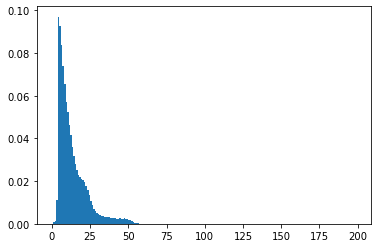

In [46]:
length_text(QADIV0)

Max of text len:  87
mean of text len:  13.243001276430434


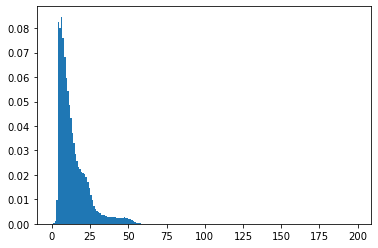

In [47]:
length_text(QADIV1)

Max of text len:  6386
mean of text len:  11.409875172537959


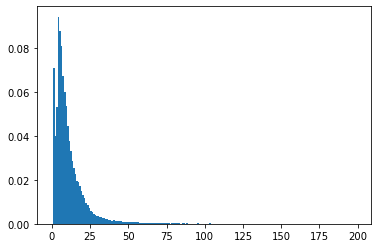

In [48]:
length_text(IADDV0)

Max of text len:  7947
mean of text len:  11.617633379343456


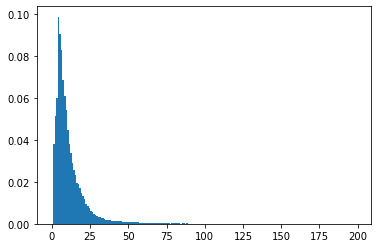

In [49]:
length_text(IADDV1)

Max of text len:  60
mean of text len:  11.626447313619325


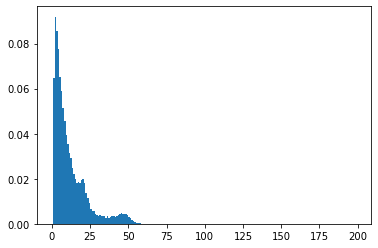

In [50]:
length_text(UM6PV0)

Max of text len:  60
mean of text len:  10.725315057206524


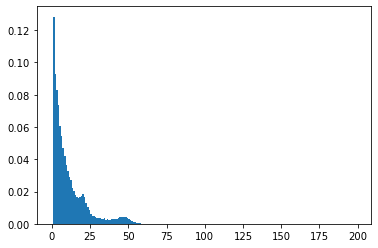

In [51]:
length_text(UM6PV1)